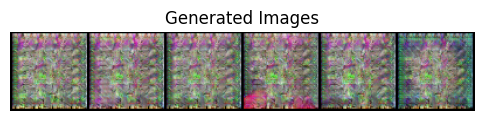

推論完了


In [7]:
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

class Generator(nn.Module):
    def __init__(self, nz: int,ngf: int, nc: int,ngpu: int):
        super(Generator, self).__init__()
        self.nz = nz
        self.ngf = ngf
        self.nc = nc
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)

# ハイパーパラメータ
nz = 100  # 潜在変数の次元
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
path_to_archive = "/Users/otaichiro/DL_GAN_202502/models_archive/celeba/generator_epoch248.pth"
# 学習済みのGeneratorモデルをロード
generator = Generator(nz, 64, 3, 4).to(device)
generator.load_state_dict(torch.load(path_to_archive, map_location=device))
generator.eval()  # 推論モードに切り替え

# 生成画像の作成
num_samples = 6  # 生成する画像の数
noise = torch.randn(num_samples, nz, 1, 1, device=device)
with torch.no_grad():
    fake_images = generator(noise).detach().cpu()

# 画像の表示
grid = vutils.make_grid(fake_images, padding=2, normalize=True)
plt.figure(figsize=(6,6))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(grid, (1,2,0)))
plt.show()

print("推論完了")
